Part 1: Solving The errors and importing libraries.

In [8]:
#TypeError: Cannot convert numpy.ndarray to numpy.ndarray --> pip install --upgrade pandas numpy


In [31]:
conda update numpy matplotlib



PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/shreyashtiwari/opt/anaconda3
  package name: matplotlib



Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd 
import numpy as np

Part 2: Uploading and reviewing the dataset 

In [16]:
df = pd.read_csv("IndiaPoliticalViolence(no Islands_Kashmir_Ladakh).csv")
df

,year,month,day,latitude,longitude,fatalities,event_type,sub_event_type,source,notes
0,2016,1,5,17.6800,83.2016,0,Violence against civilians,Abduction/forced disappearance,Chandigarh Tribune,A group of Maoists abduct and shot a TDP: Telu...
1,2016,1,5,17.6800,83.2016,0,Violence against civilians,Abduction/forced disappearance,Chandigarh Tribune,A group of Maoists abduct and shot a TDP: Telu...
2,2019,4,11,16.2349,80.0493,0,Violence against civilians,Abduction/forced disappearance,New Indian Express,"Assumed on 11 Apr, in Narasaraopet tehsil (Gun..."
3,2019,4,11,16.2349,80.0493,0,Violence against civilians,Abduction/forced disappearance,New Indian Express,"Assumed on 11 Apr, in Narasaraopet tehsil (Gun..."
4,2017,1,16,17.8619,82.1970,0,Violence against civilians,Abduction/forced disappearance,South Asia Terrorism Portal,"On 16 January 2017, six tribals were abducted ..."
...,...,...,...,...,...,...,...,...,...,...
36378,2019,6,9,26.1634,89.1838,0,Protests,Excessive force against protesters,Indo-Asian News Service; Times of India,"On 9 June 2019, BJP supporters were attacked b..."
36379,2019,6,14,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,"On 14 June 2019, rioters pelted stones at medi..."
36380,2019,6,14,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,"On 14 June 2019, rioters pelted stones at medi..."
36381,2019,7,17,22.8664,88.4011,0,Protests,Excessive force against protesters,Indian Express,"On 17 July 2019, local residents protesting ag..."


In [13]:
df['sub_event_type'].unique()

array(['Abduction/forced disappearance', 'Armed clash', 'Attack',
       'Mob violence', 'Remote explosive/landmine/IED', 'Sexual violence',
       'Grenade', 'Shelling/artillery/missile attack', 'Air/drone strike',
       'Suicide bomb', 'Excessive force against protesters'], dtype=object)

In [15]:
 df['event_type'].unique()

array(['Violence against civilians', 'Battles', 'Riots',
       'Explosions/Remote violence', 'Protests'], dtype=object)

Working on Approach 1

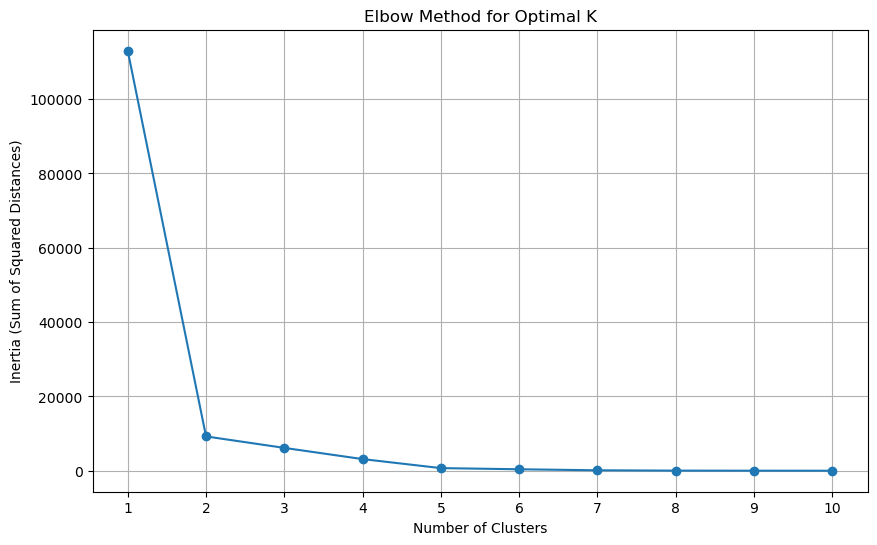

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Encode the 'sub_event_type' column using LabelEncoder
label_encoder = LabelEncoder()
df['sub_event_type_encoded'] = label_encoder.fit_transform(df['sub_event_type'])

# Initialize a list to store inertia values
inertia = []

# Range of cluster numbers to try
cluster_range = range(1, 11)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['sub_event_type_encoded']])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.xticks(cluster_range)  # Show each number in the range
plt.grid()
plt.show()


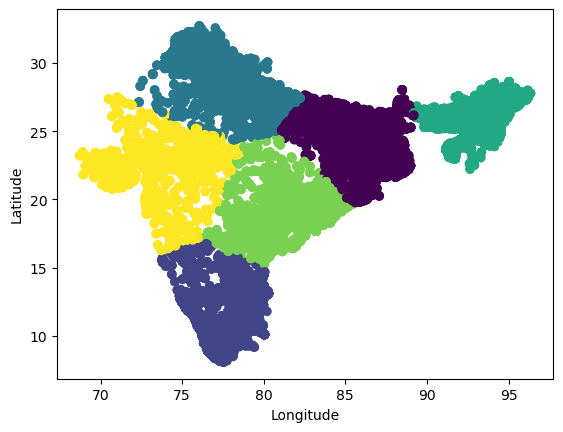

In [7]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans


# Extract latitude and longitude
coords = df[['latitude', 'longitude']]

# Convert to numpy array
coords_array = np.array(coords)

# Initialize KMeans and fit
kmeans = KMeans(n_clusters=6)  # 6 clusters based on observations.
kmeans.fit(coords_array)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df['longitude'], df['latitude'], c=df['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Working on approach 2

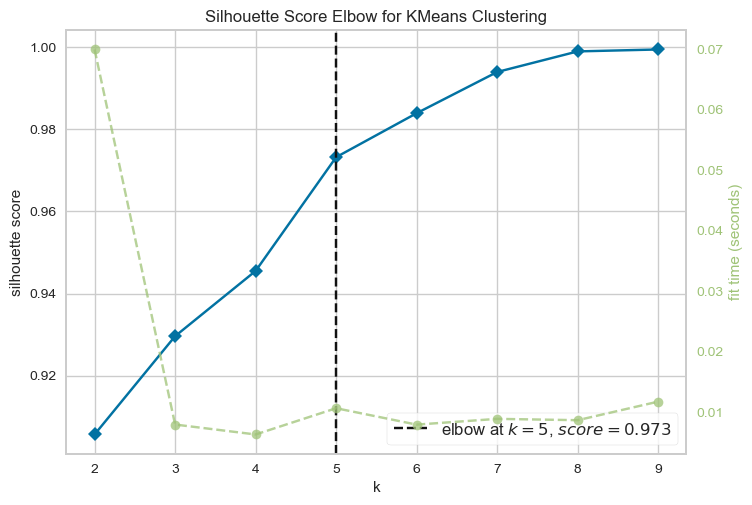

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Encode the 'sub_event_type' column using LabelEncoder
label_encoder = LabelEncoder()
df['sub_event_type_encoded'] = label_encoder.fit_transform(df['sub_event_type'])

# Select features for clustering (here we assume 'sub_event_type_encoded' is the main feature)
data = df[['sub_event_type_encoded']]

# Scale the data (important for K-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize KMeans
km = KMeans(random_state=123)

# Set up the KElbowVisualizer to evaluate the silhouette score
visualizer = KElbowVisualizer(km, k=(2, 10), metric='silhouette', timing=False)

# Fit the visualizer to the scaled data
visualizer.fit(data_scaled)

# Display the elbow plot
visualizer.poof()


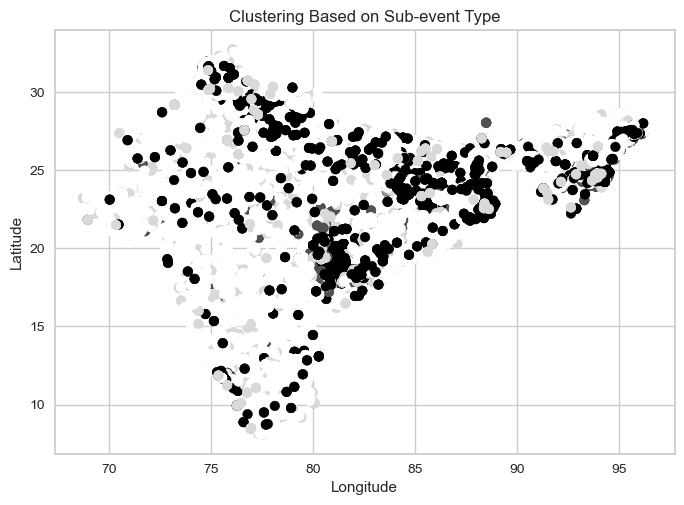

                   sub_event_type  cluster
0  Abduction/forced disappearance        2
1  Abduction/forced disappearance        2
2  Abduction/forced disappearance        2
3  Abduction/forced disappearance        2
4  Abduction/forced disappearance        2


In [29]:
 from sklearn.preprocessing import LabelEncoder

# Encode using LabelEncoder 
label_encoder = LabelEncoder()
df['sub_event_type_encoded'] = label_encoder.fit_transform(df['sub_event_type'])

# Initialize KMeans with n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model on the encoded 'sub_event_type'
df['cluster'] = kmeans.fit_predict(df[['sub_event_type_encoded']])

# Visualize the clusters 
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Based on Sub-event Type')
plt.show()

# Display the clusters
print(df[['sub_event_type', 'cluster']].head())


Event type clustering

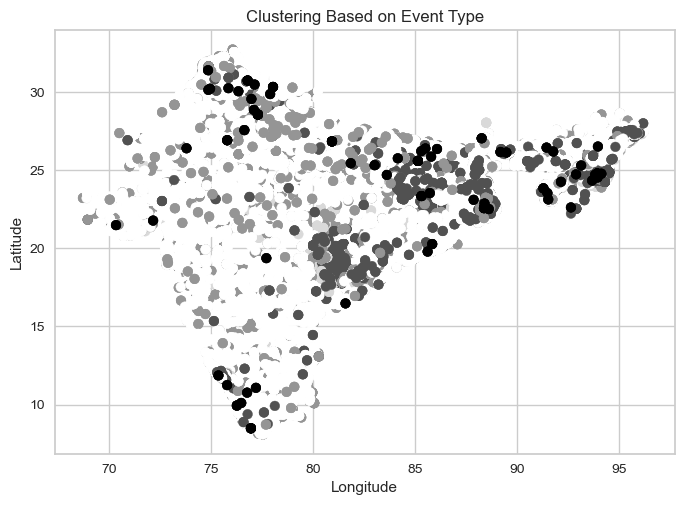

                   sub_event_type  cluster
0  Abduction/forced disappearance        2
1  Abduction/forced disappearance        2
2  Abduction/forced disappearance        2
3  Abduction/forced disappearance        2
4  Abduction/forced disappearance        2


In [20]:
 from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Encode column using LabelEncoder 
label_encoder = LabelEncoder()
df['sub_event_type_encoded'] = label_encoder.fit_transform(df['event_type'])

# Initialize KMeans with n_clusters=11
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model on the encoded 'sub_event_type'
df['cluster'] = kmeans.fit_predict(df[['sub_event_type_encoded']])

# Visualize the clusters 
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Based on Event Type')
plt.show()

# Display the clusters
print(df[['sub_event_type', 'cluster']].head())
